<a href="https://colab.research.google.com/github/imnadiarasheed/DIP/blob/main/DIP_Practice6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as n 
import cv2 as cv2 
from google.colab.patches import cv2_imshow

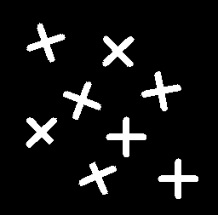

In [2]:
original=cv2.imread('drive/MyDrive/images/cca1.png',0) 
#original=cv2.imread('drive/MyDrive/images/shapes-01.jpg',0) 
cv2_imshow(original)

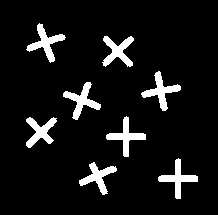

In [3]:
original = cv2.threshold(original, 127, 255, cv2.THRESH_BINARY)[1]
#original = cv2.threshold(original, 220, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(original)

In [4]:
'''original=n.array([[0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 255],
                  [0, 0, 255, 0, 0, 0],
                  [0, 255, 0, 0, 255, 255],
                  [0, 0, 0, 0, 255, 0],
                  [0, 0, 0, 0, 255, 0],
                  [0, 0, 0, 0, 0, 255]])
  
original=n.array([[0, 0, 0, 0, 0, 0],
                  [0, 0, 255, 255, 255, 0],
                  [0, 255, 0, 255, 255, 0],
                  [0, 0, 255, 255, 0, 255],
                  [0, 0, 0, 0, 0, 0]])'''
'''print(original), size=n.shape(original), print(original.shape), print(n.max(original)),
count = n.count_nonzero(original >= 255), print(count)'''
print(n.unique(original))

number_list = n.array(original)
(unique, counts) = n.unique(number_list, return_counts=True)
frequencies = n.asarray((unique, counts)).T
print(frequencies)

[  0 255]
[[    0 43086]
 [  255  3784]]


In [5]:
def numberobjects(img):  
  size=n.shape(img) 
  
  named_1=n.zeros(size,dtype=int) 
  label=1; 
  for i in range(1,size[0]): 
    for j in range(1,size[1]): 
      if (img[i,j]==255): 
        upperlabel=named_1[i-1,j] 
        prevlabel=named_1[i,j-1] 
        thislabel=upperlabel 
        if(prevlabel!=0): 
          thislabel=prevlabel 
        if(thislabel==0): 
          thislabel=label 
          label=label+1 
        named_1[i,j]=thislabel 
  return named_1

In [6]:
def listinlistcopy(lista,dstloc,srcloc): 
  while(lista[srcloc].__len__()>0): 
    lista[dstloc].append(lista[srcloc].pop()) 
  lista.__delitem__(srcloc) 
def findindex(lista,value): 
  r=-1 
  for k in range(lista.__len__()): 
    if(lista[k].count(value)>0): 
      r=k 
      break 
  return r 
def ifexists(lista,value): 
  for k in range(lista.__len__()): 
    if(lista[k].count(value)>0): 
      return 1

In [7]:
def colorobjects(img,list_objects): 

  size=n.shape(img) 
  newimg=n.ones((size),dtype=n.uint8)*255 
  for i in range(size[0]): 
    for j in range(size[1]): 
      if(img[i,j]!=0): 
        res=findindex(list_objects,img[i,j]) 
        if(res!=-1): 
          newimg[i,j]=res*25
  return newimg 

In [8]:
def secondpass(img): 

  list_objects=list([[0]]) 
  size=n.shape(img) 

  for i in range(1,size[0]): 
    for j in range(1,size[1]): 
      currvalue=img[i,j] 
      if (currvalue!=0): 
        uppervalue=img[i-1,j] 
        leftvalue=img[i,j-1] 
        k=findindex(list_objects,currvalue) 
        if(k==-1): 
          list_objects.append([currvalue]) 
        elif(uppervalue!=0 and leftvalue!=0 and uppervalue!=leftvalue): 
          upperindex=findindex(list_objects,uppervalue) 
          leftindex=findindex(list_objects,leftvalue) 
          if(upperindex!=leftindex): 
            listinlistcopy(list_objects,upperindex,leftindex) 
  return list_objects

[[0], [4, 5, 6, 9, 3, 2, 1, 15, 17, 19, 21, 23, 25, 26], [8, 10, 12, 13, 14, 16, 18, 20, 22, 24, 11, 7, 27, 28, 29, 30, 31, 32, 33, 34, 35], [40, 41, 42, 45, 49, 54, 58, 56, 53, 51, 59, 60, 61, 62, 66], [43, 44, 46, 39, 38, 37, 36, 47, 48, 50, 52, 55, 57], [63, 67, 72, 81, 83, 85], [65, 69, 71, 73, 74, 75, 76, 77, 78, 79, 70, 68, 64, 80, 82, 84, 86, 87, 88, 89, 90, 91, 92], [93, 94, 95, 107, 109, 111], [100, 101, 99, 102, 103, 104, 98, 97, 96, 105, 106, 108, 110, 112, 113, 114]]
number of objects
8


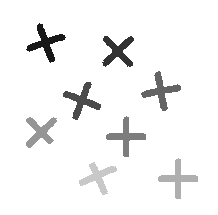

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


"cv2.imwrite('drive/MyDrive/images/lcca1.png', new_image)\nprint('printing saved image')\nnew1=cv2.imread('drive/MyDrive/images/lcca1.png',0)\nprint(new1)"

In [10]:
afterPass1=numberobjects(original) 
#print(afterPass1.shape), print(n.max(afterPass1))
#print(afterPass1)
listobjects=secondpass(afterPass1) 
print(listobjects)
print('number of objects') 
print(len(listobjects)-1) 
new_image=colorobjects(afterPass1,listobjects)
cv2_imshow(new_image), print(new_image) 
'''cv2.imwrite('drive/MyDrive/images/lcca1.png', new_image)
print('printing saved image')
new1=cv2.imread('drive/MyDrive/images/lcca1.png',0)
print(new1)'''

In [12]:
number_list = n.array(new_image)

(unique, counts) = n.unique(number_list, return_counts=True)
frequencies = n.asarray((unique, counts)).T
print(frequencies)

[[   25   492]
 [   50   478]
 [   75   486]
 [  100   486]
 [  125   470]
 [  150   451]
 [  175   470]
 [  200   451]
 [  255 43086]]
